# EDA To Prediction(DieTanic)

##### "이유한님의 캐글 코리아 캐글 스터디 커널 커리큘럼"에 따라 필사한 내용입니다.

- 필사 노트북의 원 출처 : https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

----------

### Why is the name DieTanic?
- 1912년 4월 15일, 빙하에 의해 2224명의 승객 중 1502명이 죽은 악명 높은 난파 사고이기 때문이다.

#### - Tatanic data는 kaggle conpatition에 처음 참여해서 공부하기 좋은 데이터이다.
#### - "DieTanic"은 모델링을 통해 어떤 결과를 예측할 때 워크플로우에 대한 기본적인 아이디어를 제공한다.

----------

### DieTanic의 목차

1. Exploratory Data Analysis(EDA)<br>
  1) Anaylsis of the features.<br>
  2) Finding any relations or trends considering multiple features.<br>
  <br>
2. Feature Engineering and Data Cleaning<br>
  1) Adding any few features.<br>
  2) Removing redundent features.<br>
  3) Converting features into suitable from for modeliing<br>
  <br>
3. Predictive Modeling<br>
  1) Running Basic Algorithms.<br>
  2) Cross Validation.<br>
  3) Ensembling.<br>
  4) Important Features Extraction.<br>

----------

## Part1. Exploratory Data Analysis - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
!pip install seaborn

In [2]:
# data load
data = pd.read_csv("./dataset/titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# dataset null check
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터 중 null 값이 존재하는 열은 Age, Cabin, Embarked이다. 노트 저자는 이것을 어떻게 처리할까?

###### How many Survived?

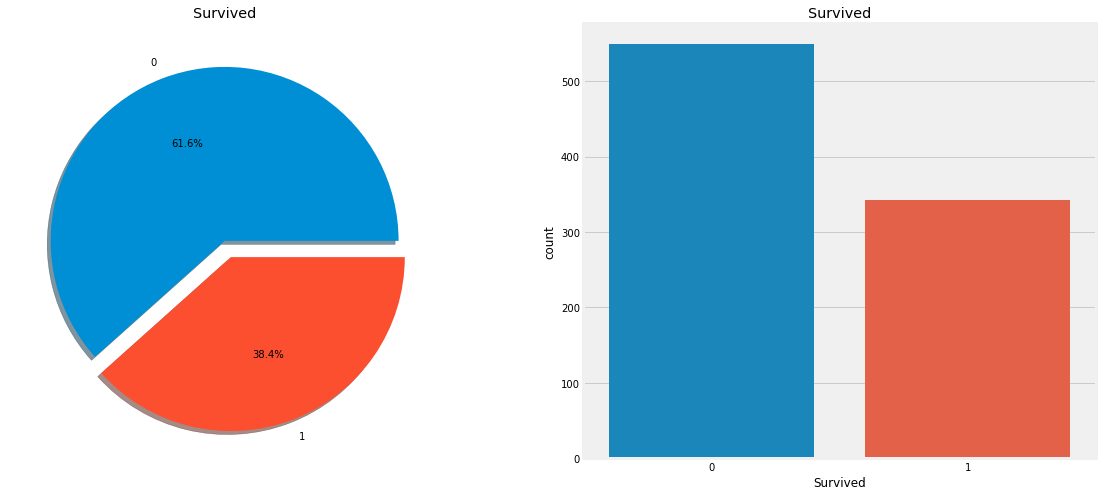

In [5]:
# 1 x 2 개의 그래프를 넣을 수 있는 subplot 생성
f, ax = plt.subplots(1, 2, figsize = (18,8))

# [0,0] 위치에 pie plot 생성
data["Survived"].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%",
                                         ax = ax[0], shadow = True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

# [0,1] 위치에 bar plot 생성
sns.countplot("Survived", data = data, ax = ax[1])
ax[1].set_title("Survived")
plt.show()

위 그래프를 보시면 많은 사람이 살아남지 못했다.

학습 데이터에는 총 891명의 승객 정보가 있으며, 그 중 살아남은 승객의 수는 350명입니다. 이것을 백분율로 환산하면 38.4%에 해당된다.<br>
우리는 앞으로 이 데이터를 통해 승객의 어떤 카데고리가 살아남게 했는지 아닌지를 알아내야 합니다.<br>
타이타닉 데이터의 다른 feature를 사용하여 생존율을 확인할 것이다. <br>

먼저 서로 다른 타입의 feature에 대해 알아보자.

-------

###  Type of Features
##### Categorical features(명목형 데이터):<br>
데이터셋에서 categorical features : Sex, Embarked

##### Ordinal features(순서형 데이터):<br>
데이터셋에서 ordinal features : Pclass

##### Continuos features(연속형 데이터):<br>
데이터셋에서 continuos features : Age

 ------

### Analysising The Features
##### Sex -> Categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

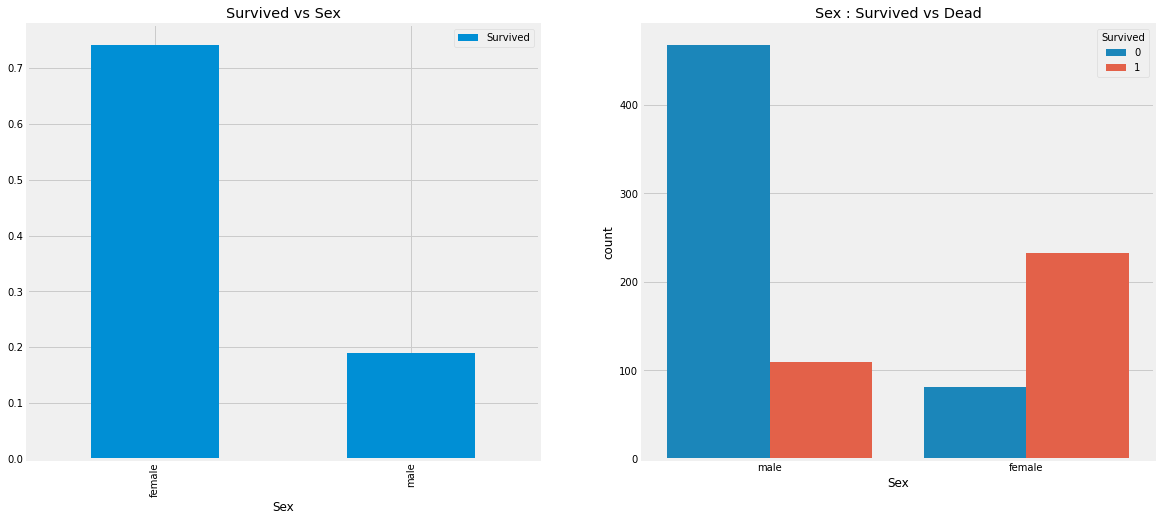

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

배에 탄 인원 수는 남성이 더 많지만 생존 수를 보면 여성의 수가 더 많다.<br>
왼쪽 그래프와 같이 여성의 생존율은 70%를 상회하는 반면, 남성의 생존율은 20%보다 못 미친다.<br>

이 feature는 매우 중요해보인다. 다른 feature도 알아보자.

###### Pclass -> Orinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


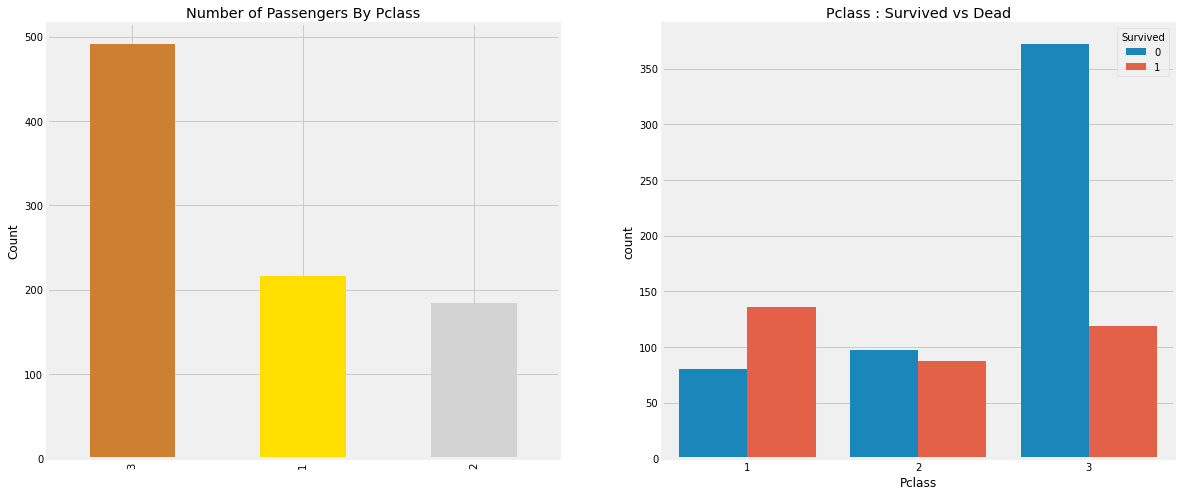

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead')

plt.show()

사람들은 돈으로 모든 것을 살 수 없다고 말한다. 하지만 Pclass가 1인 승객이 우선적으로 구조되었다는 것을 알 수 있다.

Pclass가 3인 승객이 가장 많은 승객 수를 차지했지만, 그들의 생존률은 25%에 불과했다.<br>
Pclass가 1인 승객은 63%, Pclass가 2인 승객은 48%이다. 노트의 저자는 위와 같은 결과를 보았을 때 돈과 지위는 매우 중요하다고 말하고 있다.

그렇다면 생존율과 Sex와 Pclass를 동시에 본 결과는 어떨까?

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

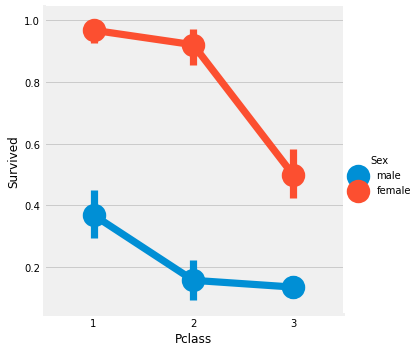

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

위 케이스의 경우 **Factorplot**을 사용했는데 명목형 데이터를 분리하여 표현할 때 유용하기 때문이다.

**Crosstap**과 **Factorplot**을 보면 우리는 쉽게 알 수 있는데 **Pclass가 1인 여성**의 생존율은 **95~96%**이며 94명 중 3명만 죽었다.

Pcalss와 관계 없이 여성이기 때문에 가장 우선적으로 구조되었음을 알 수 있다. 그 이유는 Pclass가 1인 남성의 생존율이 낮았기 때문이다.

Pclass도 중요한 feature인 것을 확인했다. 다른 feature들도 알아보자.

##### Age -> Continuos Feature

In [12]:
print('Oldest Passenger was of: ', data['Age'].max(), "Years")
print('Youngest Passenger was of: ', data['Age'].min(), "Years")
print('Average Passenger was of: ', data['Age'].mean(), "Years")

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Passenger was of:  29.69911764705882 Years


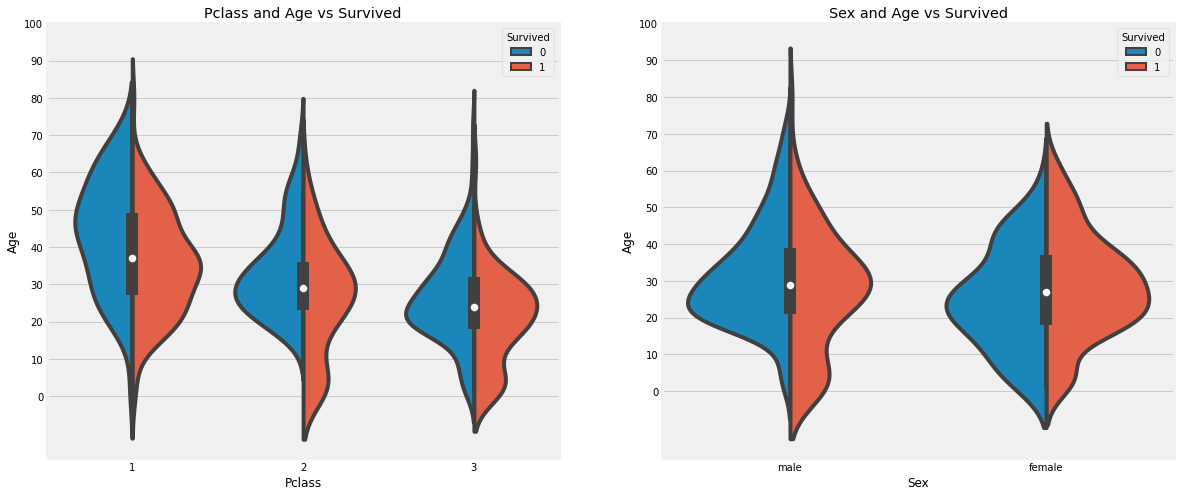

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot("Pclass", "Age", hue = "Survived", data = data, split = True, ax = ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue = "Survived", data = data, split = True, ax = ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

위 그래프를 보며:<br>
1) 10살 이하의 어린아이들은 Pclass가 낮으면 그 수가 많으며, 생존율은 Pclass와 관계 없이 좋다.<br>
2) Pclass가 1이며 나이가 20~50대인 승객들의 생존 가능성은 승객이 여성의 생존 가능성보다 좋다.<br>
3) 남성의 생존 가능성은 나이가 많이질수록 낮아진다.<br>

위에서 본 바와 같이 Age에는 177개의 null 값이 존재한다. 이것을 우리가 자주 사용하는 mean값으로 대처할 수 있다.

하지만, 나이가 4세인 승객에게 평균인 29세를 할당할 수 없다.

노트의 저자가 찾은 방법은 승객의 **Name** feature를 사용하여 조금 더 상세하게 특정 값을 부여했다.

Name에는 Mr나 Mrs 같은 단어들이 있는데, 이런 단어들을 포함하는 그룹끼리 구성하여 그룹 마다의 특성을 사용하여 특정 값을 부여하고자 한다.

In [14]:
data['Initial'] = 0
for i in data:
    # 정규식 사용하여 온점 이전의 모든 영어를 가져와 "Initail" 컬럼에 부여
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # Let extract the Salutations

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = "summer_r") # checking the Initial and Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
# 세분화된 요인들을 변경
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer','Col', 'Rev', 'Capt', 'Sir', 'Don'],
                       ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                       inplace = True)

In [17]:
data.groupby('Initial')['Age'].mean() # Let check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

##### Filling NaN Ages

In [18]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), "Age"] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any()

False

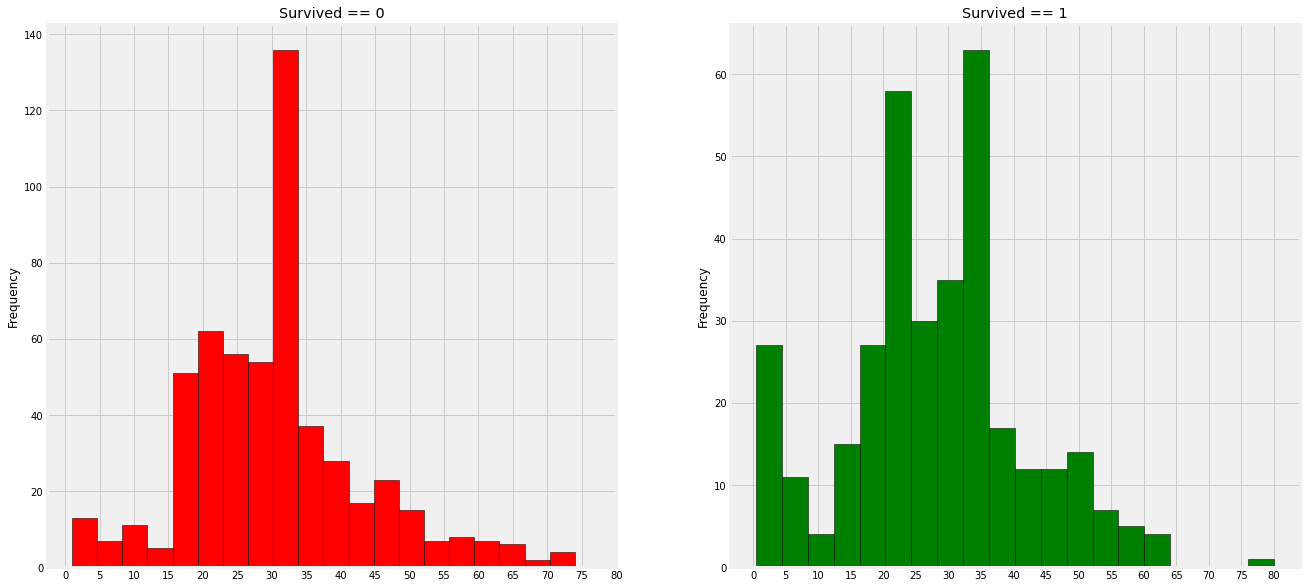

In [20]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived == 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived == 1')
ax[1].set_xticks(x1)

plt.show()

위 그래프를 보며:
    
1) 5세 이하의 아이들의 생존 수가 많다.(여성과 아이들을 먼저 구하는 정책 때문.)<br>
2) 가장 나이가 많은 승객이 생존했다.<br>
3) 가장 많이 죽은 연령층은 30~40대 이다.<br>

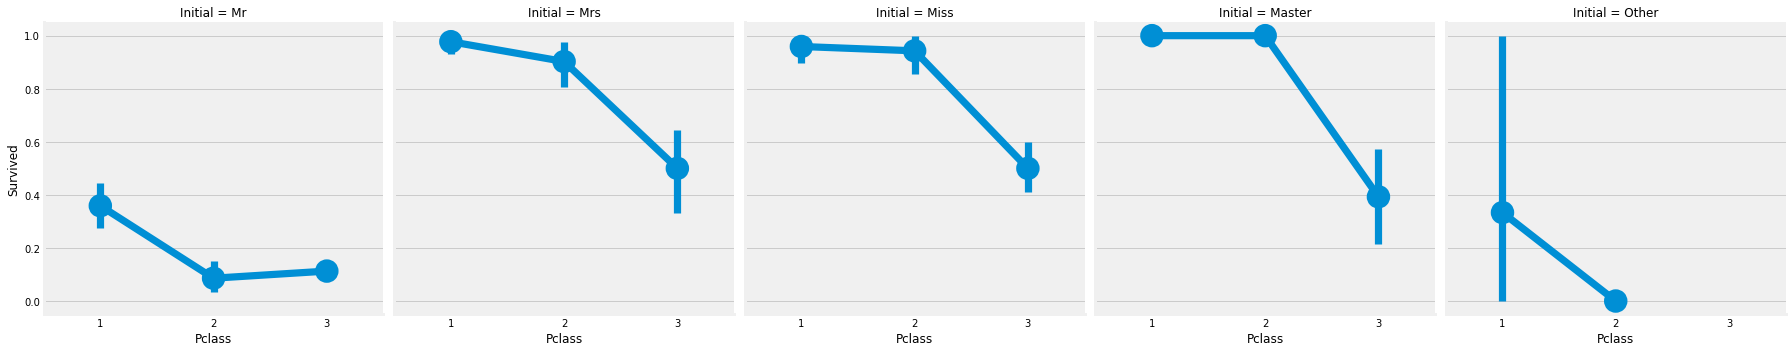

In [21]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

##### Embarked -> Categorical Feature

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

##### Chances for Survival by Port of Embarkation

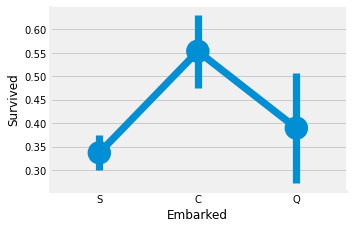

In [23]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

C 포트의 생존율이 55%로 가장 높았고 S 포트의 생존율은 가장 낮다.

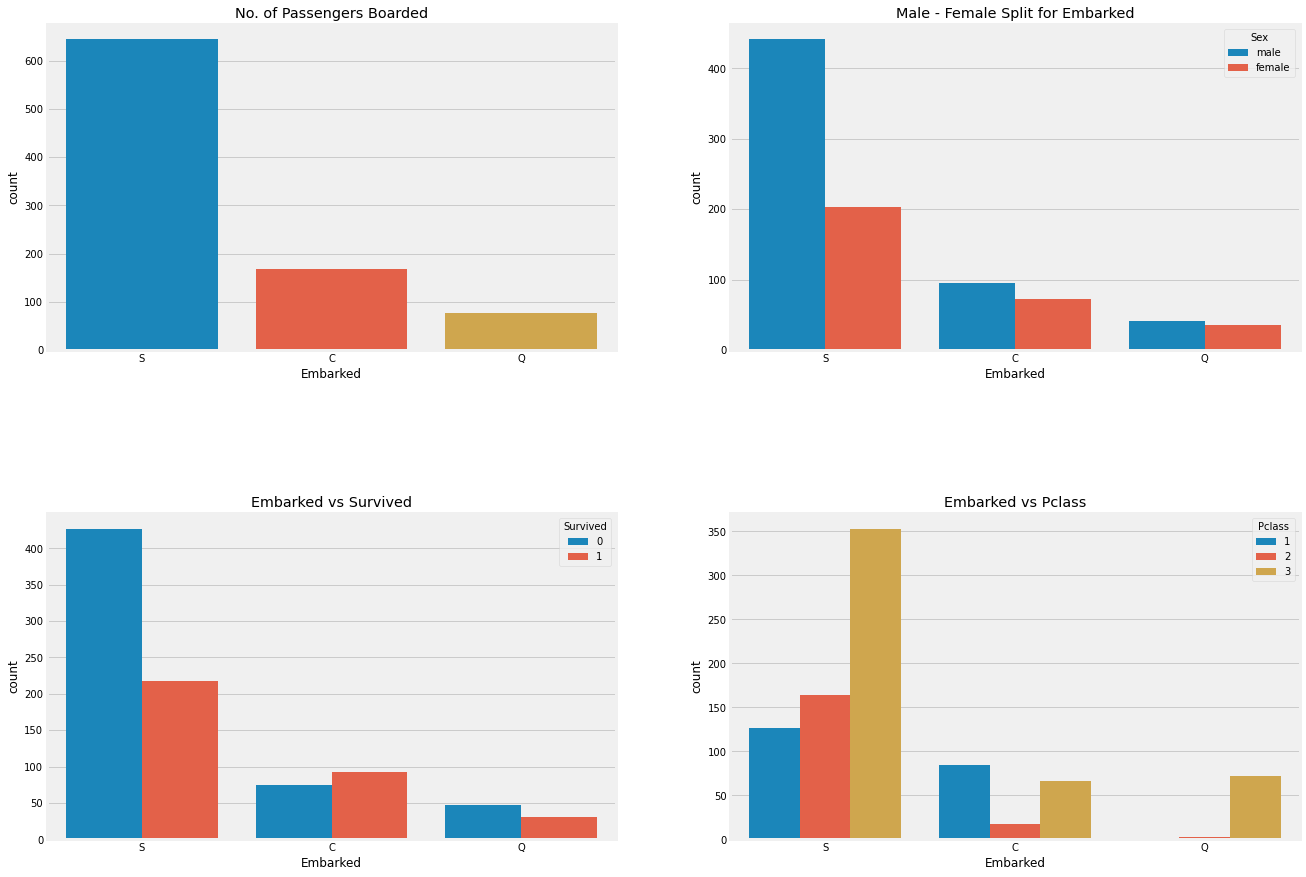

In [24]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0, 1].set_title('Male - Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

위 그래프를 보며:

(1) 가장 많은 승객을 태운 곳은 S이다. 가장 많이 탄 유형의 승객은 Pcalss가 3인 승객이다.<br>
(2) C에 탑승한 승객들은 운이 좋게 많은 수가 살아남았다. 그 이유는 아마도 Pclass가 1 또는 2인 승객이 대부분 구조됐을 것이다.<br>
(3) S에 승선한 사람들은 부자들이 승선한 곳을 봅니다. 여전히 S에서의 생존률은 낮습니다. 그 이유로 약 81%의 Pclass가 3인 승객들이 살아남지 못했기 때문입니다.<br>
(4) Q에 승선한 승객은 Pclass가 3인 승객이 95%이다.

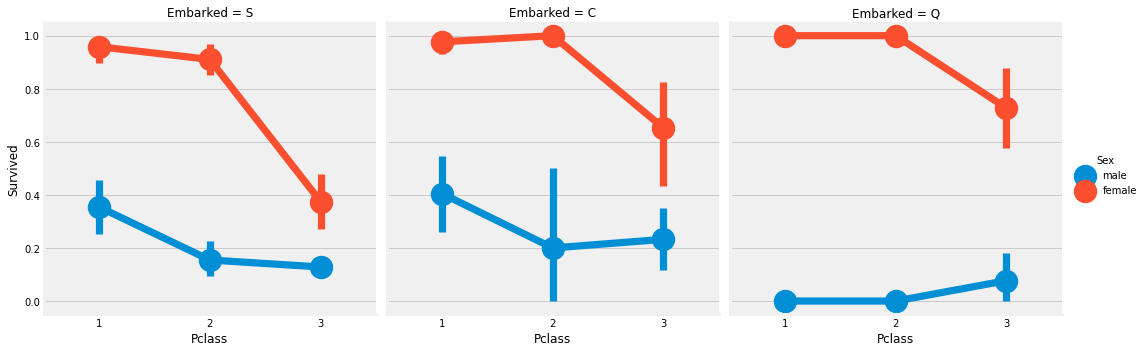

In [25]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

위 그래프를 보며:

(1) 여성은 Pclass와 상관없이 생존률이 1에 가깝다.<br>
(2) S는 성별에 관계 없이 Pclass가 3인 승객의 생존률이 낮다.(돈이 문제다.)<br>
(3) Q는 Pclass가 3인 승객이 주류였기 때문에 남자들은 운이 안 좋다.<br>

##### Filling Embarked NaN

승객이 가장 많이 승선한 구역은 S이므로, NaN에는 S로 채운다.

In [26]:
data['Embarked'].fillna('S', inplace = True)

In [27]:
data.Embarked.isnull().any() # Finally No NaN value

False

##### SibSip -> Discrete Feature

이 feature는 혼자인지 가족과 있는지 나타냅니다.

Sibiling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


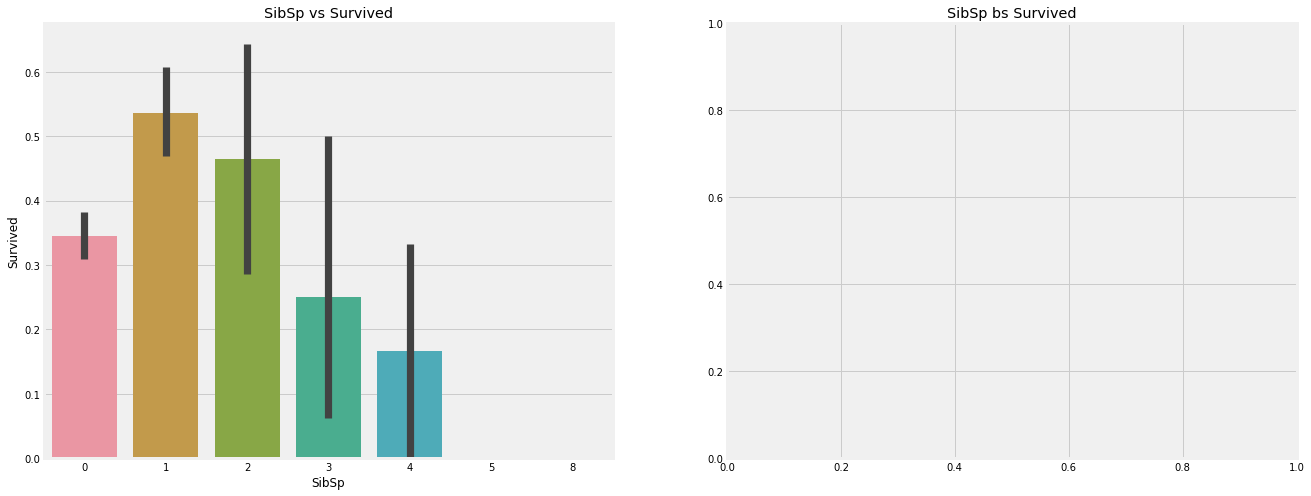

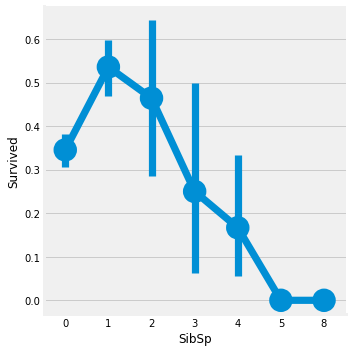

In [29]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')

# 코드를 그대로 가져오면 표에 나타나지 않음
sns.factorplot('SibSp', 'Survived', data = data)
ax[1].set_title('SibSp bs Survived')

plt.close(3)
plt.show()

In [94]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


위 그래프를 보며:

막대 그래프와 factor 그래프는 승객이 가족이 없이 혼자 탑승한 경우 생존률이 34.5%임을 보여준다.<br>
가족의 수가 증가하면 그래프는 감소한다. 즉, 가족이 승선해있으면 내가 아닌 가족을 먼저 구하려고 할 것이기 때문이다.<br>
가족 구성원이 5~8명인 가족은 생존률이 0%이다. 그것을 증명하는 것은 Pclass일 수 있다.<br>

crosstab 표를 보면 가족 구성원이 4명 이상인 사람들은 모두 Pclass가 3에 속한다.

##### Parch

In [30]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


위 표를 보면 알 수 있듯이 대가족은 대부분 Pclass가 3이다.

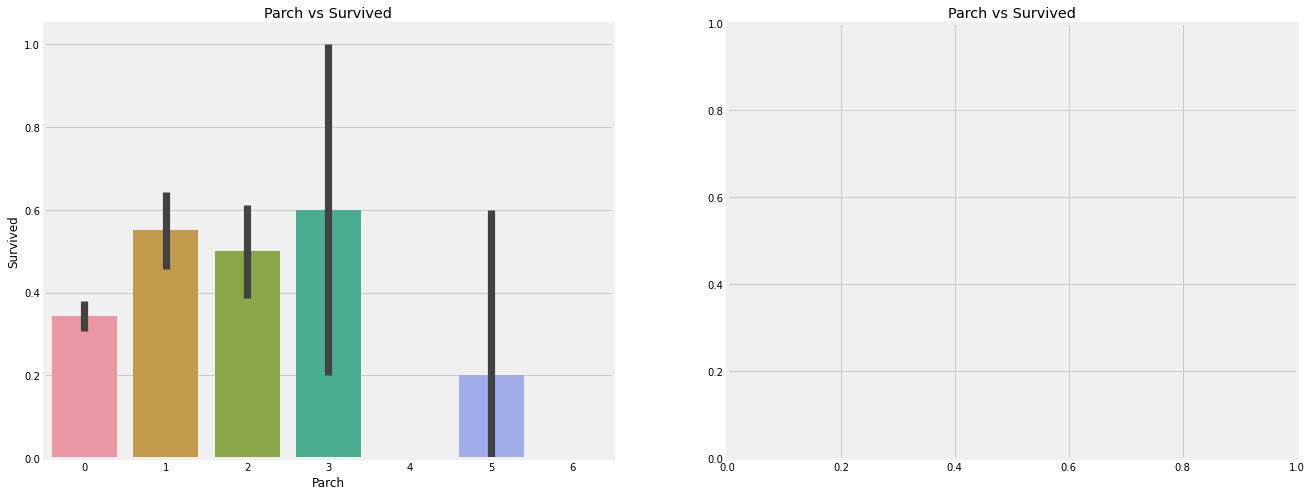

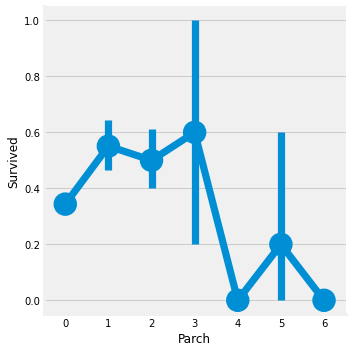

In [31]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('Parch', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

위 그래프를 보며:

위의 결과도 꽤 유사하게 나왔다. 부모가 탑승한 승객은 생존 가능성이 높다. 그러나 수가 증가하면 감소한다.<br>
생존 가능성은 배에 1~3명의 보호자를 둔사람이 좋다. 혼자 있는 것은 치명적이며 누군가 4명 이상의 보호자가 있게 되면 생존 가능성은 줄어든다.

##### Fare -> Continous Feature

In [32]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


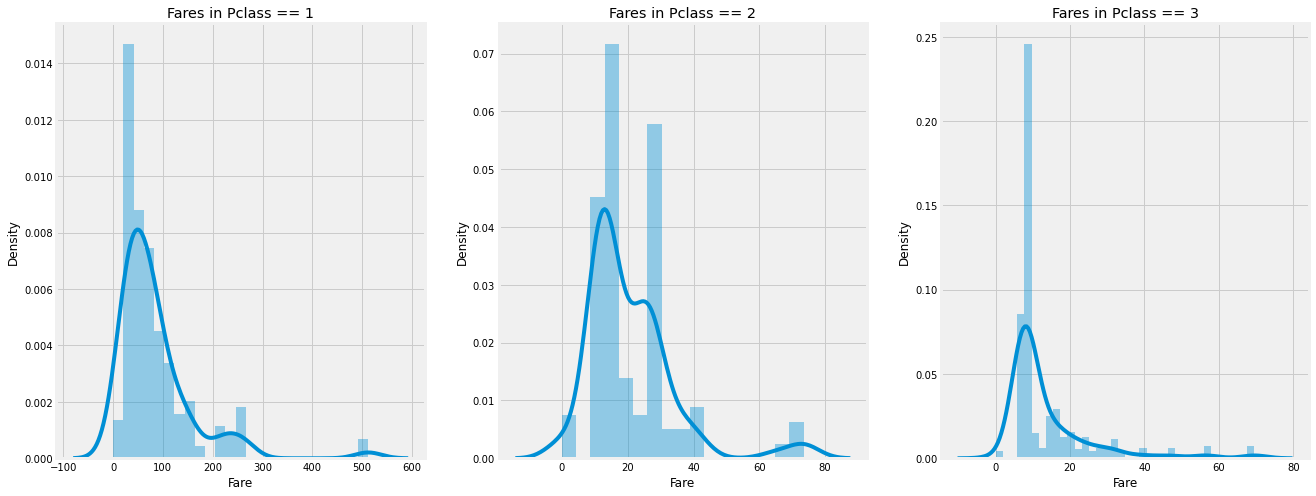

In [33]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass == 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass == 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass == 3')

plt.show()

#### Observations in a Nutshell for all features:

**Sex**: 남성과 여성의 생존률을 비교했을 때 여성의 생존률이 더 높다.<br>
**Pclass**: 보여지는 추세는 1등석 승객이 더 나은 생존률을 보이고 3등석 승객의 생존률을 매우 낮다. <br>
**Age**: 5-10세 이하의 아이들은 높은 생존률가지고 있다. 15-35세의 승객이 많이 죽었다.<br>
**Embarked**: Pclass가 1인 승객의 생존은 S보다 C가 더 유리하다. Q의 승객은 모두 Pclass가 3이다.<br>
**Parch + SibSp**: 혼자나 대가족일 때보다 같이 승선한 사람이 1~3명일 때 생존에 유리하다.<br>

#### Coreelation Between The Features

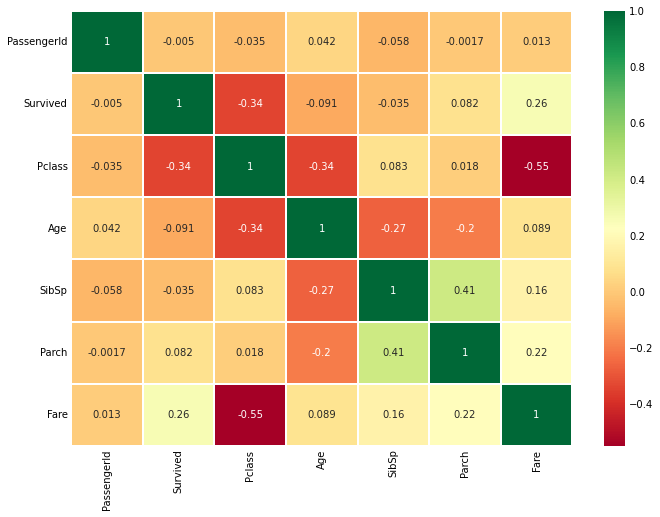

In [34]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2) # data.corr() -> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

-------

## Part2 : Feature Engineering and Data Cleaning

저자는 feature engineering에 대해 아래와 같이 설명하고 있다.

데이터 셋에는 모든 feature가 중요하지 않을 수 있다. 제거해야하는 중복 feature가 존재할 수 있다. 또한 특정 feature를 통해 새로운 feature 생성해낼 수 있다.

예를 들어, Name 변수에서 이니셜만 가져와 새로운 변수를 생성하는 것과 같은 상황을 말한다.

##### Age_band

**Age 변수가 가지고 있는 문제 :**<br>
Age 변수는 연속형 변수인데 이는 머신러닝 모델에 따라 연속형 변수가 유리할 때가 있고, 범주형 변수가 유리할 때가 있다.<br>
예를 들어, 성별이라는 변수는 남성과 여성으로 쉽게 분리할 수 있지만, 특정 그룹을 연령별로 분류할 때 n명이라면 n개의 값으로 분류할 수 있다.<br>

이럴 때 연속형 변수를 범주화하여 범주로 분류한다면 데이터에 따라 분석할 때 유리할 수 있다.

In [35]:
# Age 변수를 5개의 범주로 범주화
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [36]:
# checking the number of passenegers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


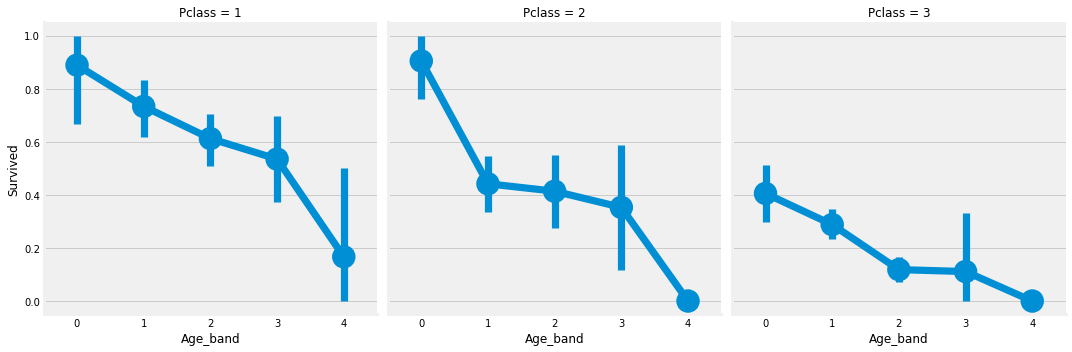

In [37]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')
plt.show()

#### Family_Size and Alone

Parch와 SibSp 변수를 통해 "Family_size"와 "Alone"이라는 새로운 변수를 생성할 수 있다.<br>
생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공한다. 또한 "Alone"은 승객이 혼자인지 아닌지의 여부를 나타낸다.

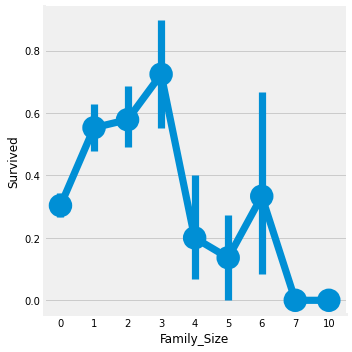

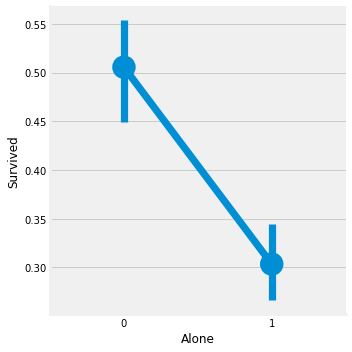

In [38]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # family size

data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1 # alone

# f, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.factorplot('Family_Size', 'Survived', data = data, ax = ax[0])
# ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data = data, ax = ax[1])
# ax[1].set_title('Alone vss Survived')

plt.show()

**Family_Size = 0 이라는 것은 승객이 혼자 탑승했다는 것을 의미합니다.** 확실히, 혼자 탑승한 경우 생존률이 많이 줄어듭니다.<br>
또한 Family_Size가 4보다 크면 생존률이 떨어지는 것을 볼 수 있습니다. 이와 같은 사실을 통해 모델에 중요한 변수가 될 것 입니다.

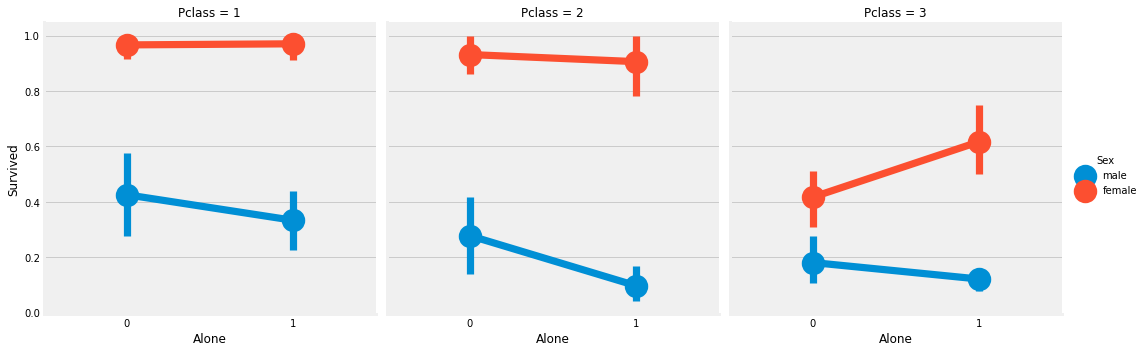

In [39]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

Pclass가 3인 여성을 제외하고 혼자인 경우보다 혼자가 아닌 경우가 생존률이 더 높은 것을 알 수 있다.

#### Fare_Range

요금 변수도 마찬가지로 연속형 변수이기 때문에, 순서형 변수로 변환할 필요가 있다. 이를 위해 **판다스의 qcut**이라는 것을 활용 하겠다.<br>
**qcut**은 값을 우리가 원하는 개수만큼 값을 나눠준다. 따라서 5개로 나누길 원한다면 각 범주가 균일한 개수가 되도록 나눠준다.

In [40]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


**Fare_Range가 증가할 때 생존률이 증가한다.**
이제 **Age_band**와 같이 범주화를 하자

In [41]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

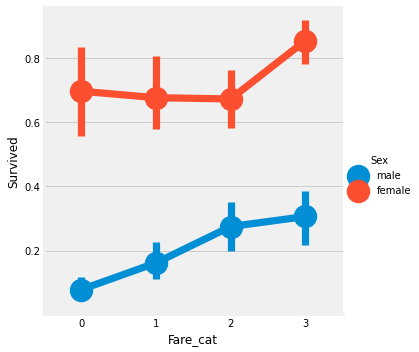

In [42]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex')
plt.show()

확실히, Fare_cat이 증가할수록 생존율이 증가했다. 모델 학습시 성별 변수와 같이 사용한다면 중요한 변수가 될 수 있을 것이다.

### Converting String Values into Numeric

머신 러닝 모델에는 문자열 변수를 사용할 수 없으니 성별 등의 변수를 숫자형 타입의 변수로 바꿔줘야 한다.

In [46]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace = True)

#### Dropping UnNeeded Features

**Name** → Name은 어떠한 범주형 값으로 변환되지 않는다<br>
**Age** → Age_band가 있으므로 필요하지 않다.<br>
**Ticket** → 분류할 수 없는 임의의 문자열이다.<br>
**Fare** → Fare_cat이 있으므로 필요하지 않다.<br>
**Cabin** → 많은 관측치가 NaN값을 가지고 있거나 승객이 여러 Cabin을 가지고 있다. 분류가 어렵기 때문에 필요하지 않다.<br>
**Fare_Range** → Fare_cat이 있으므로 필요하지 않다.<br>
**PassengerId** → 고유한 정보이므로 분류할 수 없다.

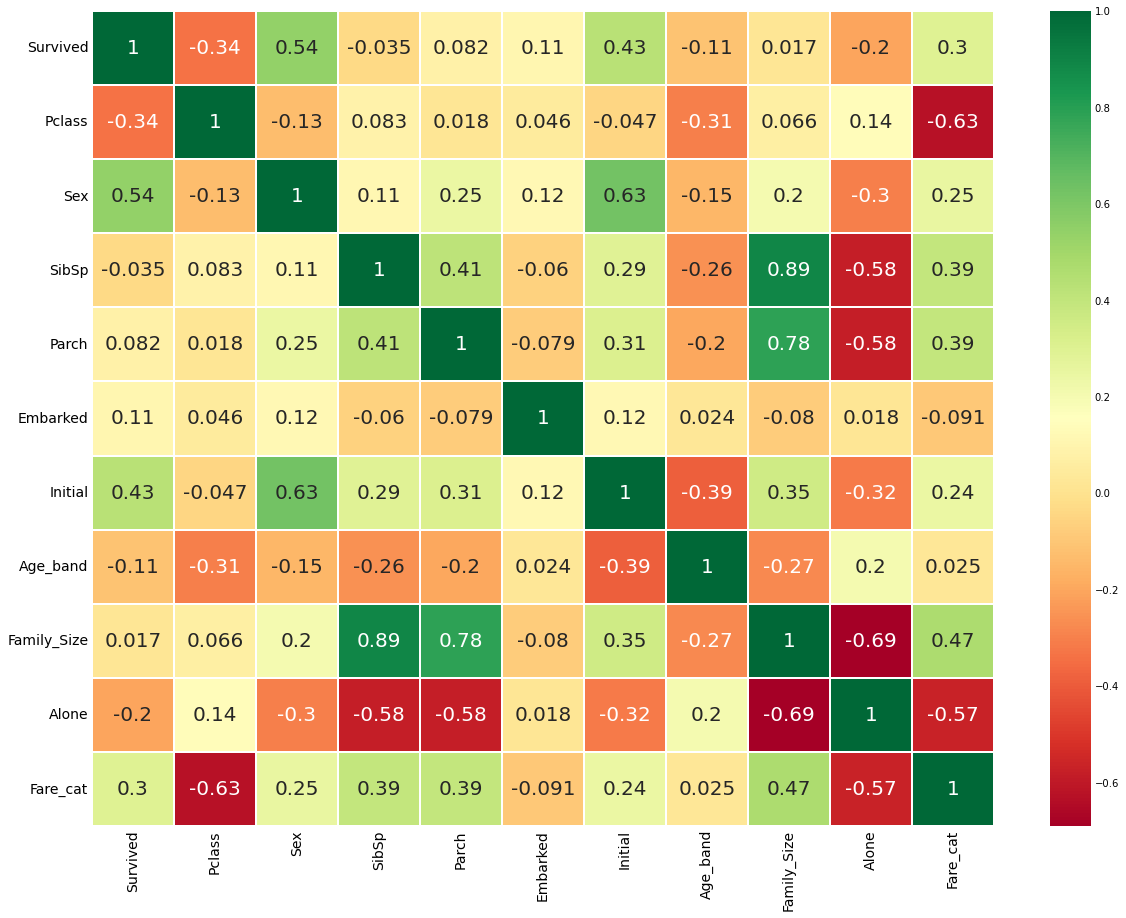

In [47]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace = True)

sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size' : 20})

fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

------

## Part3 : Predictive Modeling

우리는 EDA를 통해 어느정도의 인사이트를 얻었다. 그러나 이것이 승객이 살아남은 것인지 죽은 것인지 정확히 예측할 수 없다.<br>
그래서 이제 우리는 승객의 생존 여부를 몇 개의 분류 알고리즘을 통해 예측할 것이다.<br>
모델의 알고리즘 목록은 아래와 같다.

1) Logistic Regression

2) Support Vector Machines(Linear and rdial)

3) Random Forest

4) K-Nearest Neighbours

5) Naive Bayes

6) Decision Tree

In [48]:
# import all the required ML packages
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

In [49]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

#### Redial Support Vector Machines(rbf-SVM)

In [51]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)

print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [52]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)

print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


1. 데이터셋 description
2. 분석 기법의 **간략한 이론**
3. 라이브러리 사용법
4. 해당 커널의 특징(다른 커널과의 차별점)
5. 배운점 및 어려웠던 점